In [573]:
%pylab inline
import numpy as np
import netCDF4 as nc
import datetime
import matplotlib.pyplot as plt
import tracpy.tools
import tracpy
import glob
import cartopy.crs as ccrs
import cmocean as cmo
import cartopy
import tracpy.plotting
import octant
from matplotlib import cm, colors
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['hist', 'colors', 'time', 'grid']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [32]:
proj = tracpy.tools.make_proj('nwgom-pyproj')
loc = "http://copano.tamu.edu:8080/thredds/dodsC/NcML/txla_hindcast_agg"
grid = tracpy.inout.readgrid(loc, proj, usespherical=True)

# Access salinity of all grid points over East Bank

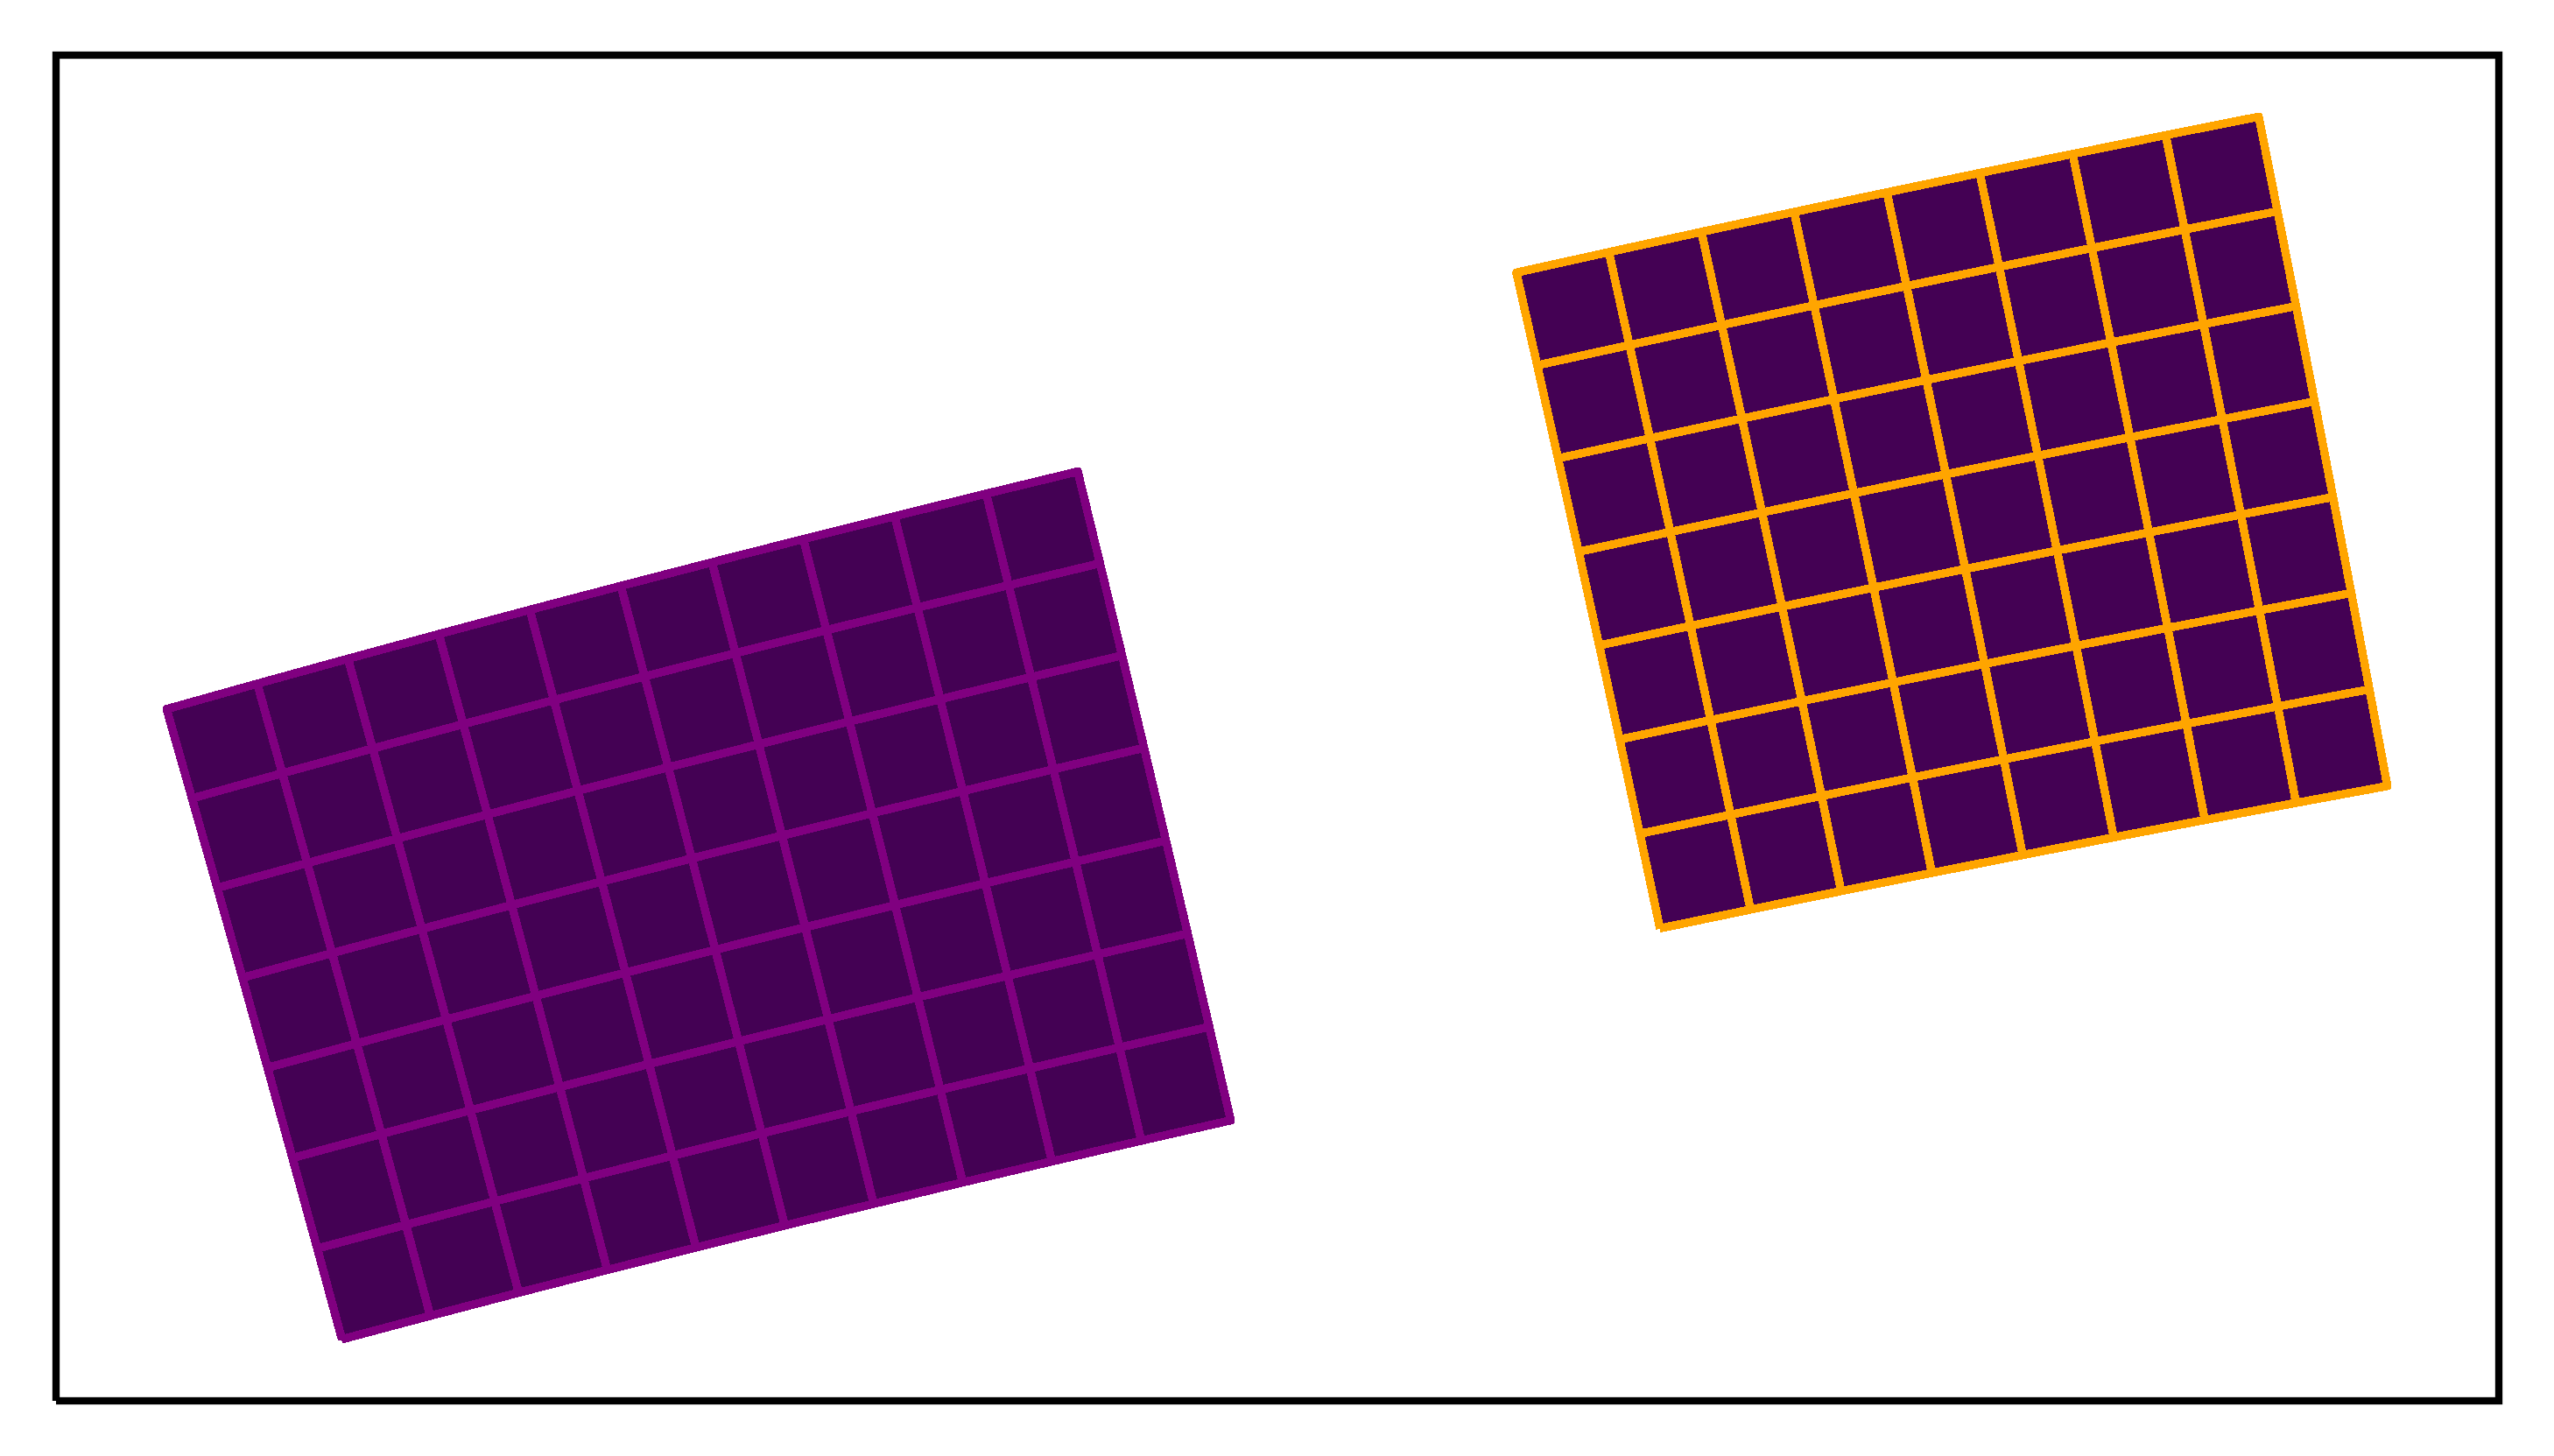

In [22]:
fig = plt.figure(figsize=(6,4),dpi=600)   

ax = fig.add_subplot(111, projection=ccrs.Mercator())
# fig,ax = tracpy.plotting.background(grid, ax=ax, fig=fig, extent=[-98, -87.5, 22.8, 30.5],
#                            col='lightgrey', halpha=1, outline=[1, 1, 0, 1], res='10m',
#                            fontsize=10,proj=ccrs.Mercator()) 

ax.pcolormesh(grid.lon_rho[26:34,286:297], grid.lat_rho[26:34,286:297], grid.mask_rho[26:34,286:297], color="purple", label="West Bank",transform=ccrs.PlateCarree());
ax.pcolormesh(grid.lon_rho[27:35,301:310], grid.lat_rho[27:35,301:310], grid.mask_rho[27:35,301:310], color="orange", label="East Bank",transform=ccrs.PlateCarree());


In [33]:
d = nc.Dataset(loc)
d["salt"].shape

(210384, 30, 191, 671)

Start time of July 1 2016 is -4412

End time of July 31 2016 is -3668

# July 2016 histogram

In [134]:
ds1 = d["salt"][-4412:-4000, 29, 27:35, 301:310]
ds2 = d["salt"][-4000:-3800, 29, 27:35, 301:310]
ds3 = d["salt"][-3800:-3668, 29, 27:35, 301:310]

In [141]:
hist1, bins = np.histogram(ds1,50)
hist2, bins = np.histogram(ds2, bins=bins)
hist3, bins = np.histogram(ds3, bins=bins)

<BarContainer object of 50 artists>

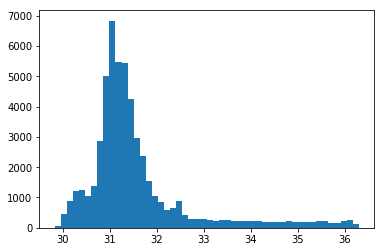

In [155]:
plt.bar( bins[:-1],  hist1+hist2+hist3, width=0.12959)

In [484]:
bins

array([25.        , 25.2173913 , 25.43478261, 25.65217391, 25.86956522,
       26.08695652, 26.30434783, 26.52173913, 26.73913043, 26.95652174,
       27.17391304, 27.39130435, 27.60869565, 27.82608696, 28.04347826,
       28.26086957, 28.47826087, 28.69565217, 28.91304348, 29.13043478,
       29.34782609, 29.56521739, 29.7826087 , 30.        , 30.2173913 ,
       30.43478261, 30.65217391, 30.86956522, 31.08695652, 31.30434783,
       31.52173913, 31.73913043, 31.95652174, 32.17391304, 32.39130435,
       32.60869565, 32.82608696, 33.04347826, 33.26086957, 33.47826087,
       33.69565217, 33.91304348, 34.13043478, 34.34782609, 34.56521739,
       34.7826087 , 35.        , 35.2173913 , 35.43478261, 35.65217391,
       35.86956522, 36.08695652, 36.30434783, 36.52173913, 36.73913043,
       36.95652174, 37.17391304, 37.39130435, 37.60869565, 37.82608696,
       38.04347826, 38.26086957, 38.47826087, 38.69565217, 38.91304348,
       39.13043478, 39.34782609, 39.56521739, 39.7826087 , 40.  

# Total histogram

-4412 to -3668

<BarContainer object of 69 artists>

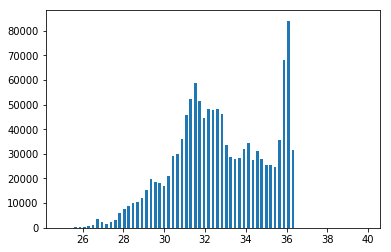

In [531]:
# bins = np.linspace(25,40,70)
# hist = np.zeros(len(bins)-1)

ds = d["salt"][ start[71] : end[71] , 29, 27:35, 301:310]
hist += np.histogram(ds,bins)[0]

plt.bar( bins[:-1],  hist, width=0.12959)

In [454]:
np.savez("salinityhist", hist=hist, bins=bins)

<BarContainer object of 69 artists>

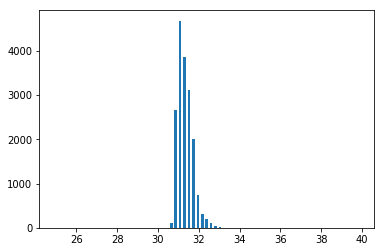

In [457]:
# print( datetime.datetime.fromtimestamp(d['ocean_time'][start[68]]) )

bins16 = np.linspace(25,40,70)
hist16 = np.zeros(len(bins)-1)

ds = d["salt"][ start[71] : end[71] , 29, 27:35, 301:310]
hist16 += np.histogram(ds,bins)[0]

plt.bar( bins16[:-1],  hist16, width=0.12959)

In [458]:
np.savez("salinityhist2016", hist=hist16, bins=bins16)

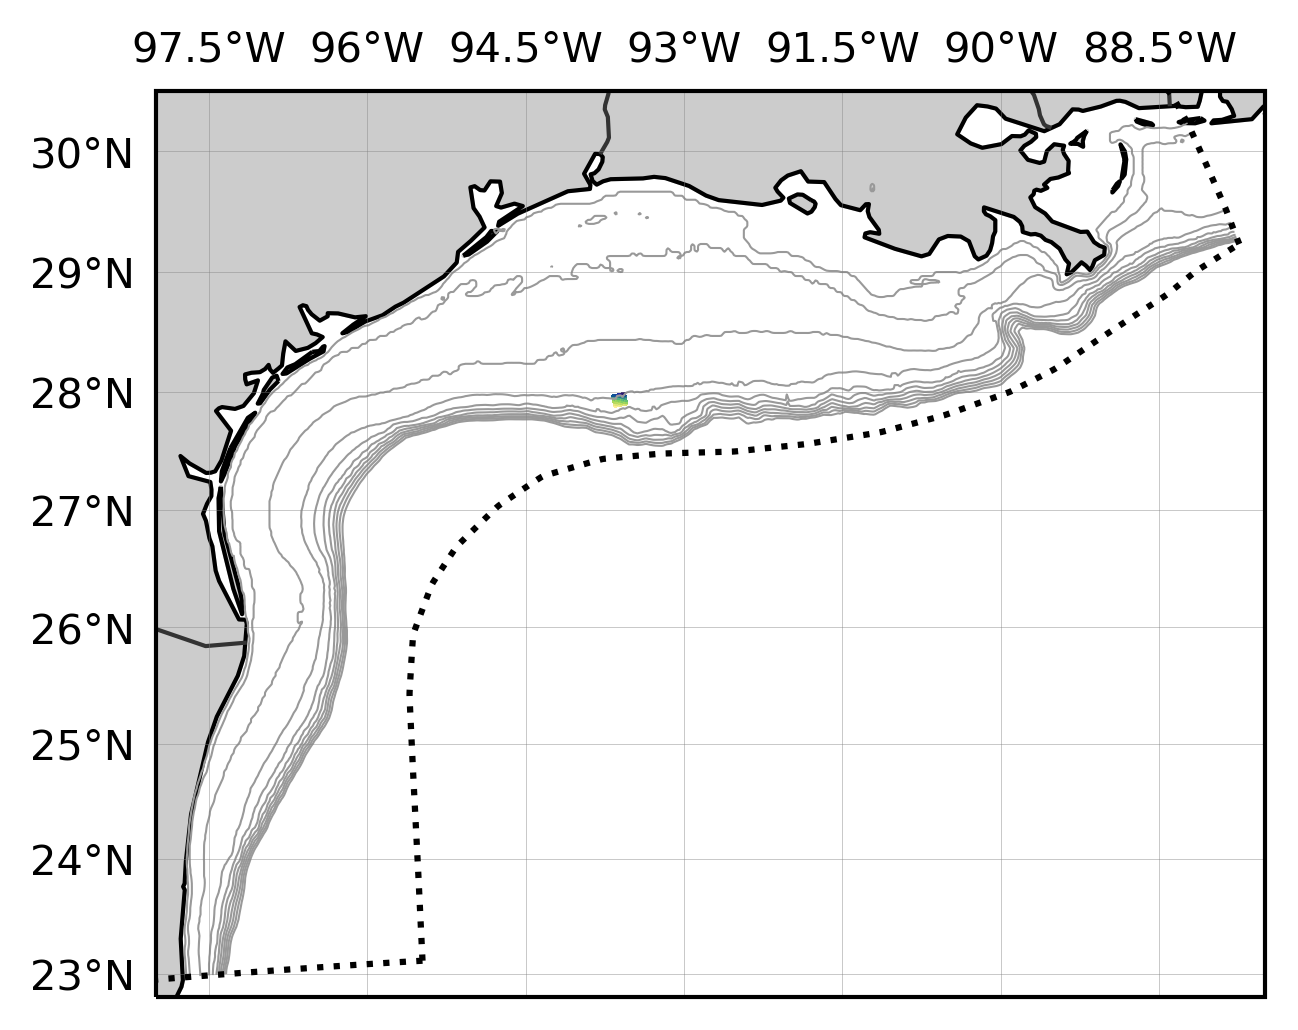

In [571]:
fig = plt.figure(figsize=(6,4),dpi=300)
ax = fig.add_subplot(111, projection=ccrs.Mercator())

fig, ax = tracpy.plotting.background(grid, ax=ax, fig=fig, extent=[-98, -87.5, 22.8, 30.5],col='lightgrey', halpha=1, outline=[1, 1, 0, 1], res='50m',fontsize=10,proj=cartopy.crs.Mercator()) 
ax.pcolormesh(d["lon_rho"][27:35,301:310], d["lat_rho"][27:35,301:310], d["salt"][10,29,27:35,301:310], transform=ccrs.PlateCarree(), cmap=cmo.cm.haline)




In [279]:
start_time = []
leap = 0
for i in range(24):
    if (i+1)%4 == 0: leap += 1
    time = 4348 + (i*8760) + leap*24
    print( datetime.datetime.fromtimestamp(d['ocean_time'][time]) )
    print( datetime.datetime.fromtimestamp(d['ocean_time'][time+248]) )
    print( datetime.datetime.fromtimestamp(d['ocean_time'][time+2*248]) )
    start_time.append( time )
    start_time.append( time+248 )
    start_time.append( time+2*248 )

1993-07-01 00:00:00
1993-07-11 08:00:00
1993-07-21 16:00:00
1994-07-01 00:00:00
1994-07-11 08:00:00
1994-07-21 16:00:00
1995-07-01 00:00:00
1995-07-11 08:00:00
1995-07-21 16:00:00
1996-07-01 00:00:00
1996-07-11 08:00:00
1996-07-21 16:00:00
1997-07-01 00:00:00
1997-07-11 08:00:00
1997-07-21 16:00:00
1998-07-01 00:00:00
1998-07-11 08:00:00
1998-07-21 16:00:00
1999-07-01 00:00:00
1999-07-11 08:00:00
1999-07-21 16:00:00
2000-07-01 00:00:00
2000-07-11 08:00:00
2000-07-21 16:00:00
2001-07-01 00:00:00
2001-07-11 08:00:00
2001-07-21 16:00:00
2002-07-01 00:00:00
2002-07-11 08:00:00
2002-07-21 16:00:00
2003-07-01 00:00:00
2003-07-11 08:00:00
2003-07-21 16:00:00
2004-07-01 00:00:00
2004-07-11 08:00:00
2004-07-21 16:00:00
2005-07-01 00:00:00
2005-07-11 08:00:00
2005-07-21 16:00:00
2006-07-01 00:00:00
2006-07-11 08:00:00
2006-07-21 16:00:00
2007-07-01 00:00:00
2007-07-11 08:00:00
2007-07-21 16:00:00
2008-07-01 00:00:00
2008-07-11 08:00:00
2008-07-21 16:00:00
2009-07-01 00:00:00
2009-07-11 08:00:00


In [280]:
start = np.array( start_time )

In [281]:
end_time = []
leap = 0
for i in range(24):
    if (i+1)%4 == 0: leap += 1
    time = 248 + 4348 + (i*8760) + leap*24
    print( datetime.datetime.fromtimestamp(d['ocean_time'][time]) )
    print( datetime.datetime.fromtimestamp(d['ocean_time'][time+248]) )
    print( datetime.datetime.fromtimestamp(d['ocean_time'][time+2*248]) )
    end_time.append( time )
    end_time.append( time+248 )
    end_time.append( time+2*248 )
    

1993-07-11 08:00:00
1993-07-21 16:00:00
1993-08-01 00:00:00
1994-07-11 08:00:00
1994-07-21 16:00:00
1994-08-01 00:00:00
1995-07-11 08:00:00
1995-07-21 16:00:00
1995-08-01 00:00:00
1996-07-11 08:00:00
1996-07-21 16:00:00
1996-08-01 00:00:00
1997-07-11 08:00:00
1997-07-21 16:00:00
1997-08-01 00:00:00
1998-07-11 08:00:00
1998-07-21 16:00:00
1998-08-01 00:00:00
1999-07-11 08:00:00
1999-07-21 16:00:00
1999-08-01 00:00:00
2000-07-11 08:00:00
2000-07-21 16:00:00
2000-08-01 00:00:00
2001-07-11 08:00:00
2001-07-21 16:00:00
2001-08-01 00:00:00
2002-07-11 08:00:00
2002-07-21 16:00:00
2002-08-01 00:00:00
2003-07-11 08:00:00
2003-07-21 16:00:00
2003-08-01 00:00:00
2004-07-11 08:00:00
2004-07-21 16:00:00
2004-08-01 00:00:00
2005-07-11 08:00:00
2005-07-21 16:00:00
2005-08-01 00:00:00
2006-07-11 08:00:00
2006-07-21 16:00:00
2006-08-01 00:00:00
2007-07-11 08:00:00
2007-07-21 16:00:00
2007-08-01 00:00:00
2008-07-11 08:00:00
2008-07-21 16:00:00
2008-08-01 00:00:00
2009-07-11 08:00:00
2009-07-21 16:00:00


In [282]:
end = np.array(end_time)

## Gaussian

In [577]:
def func(x, a, b, c, d ):
    y = a*np.exp(-np.power((x - b), 2.)/(2. * c**2.)) + d

    return y

/opt/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


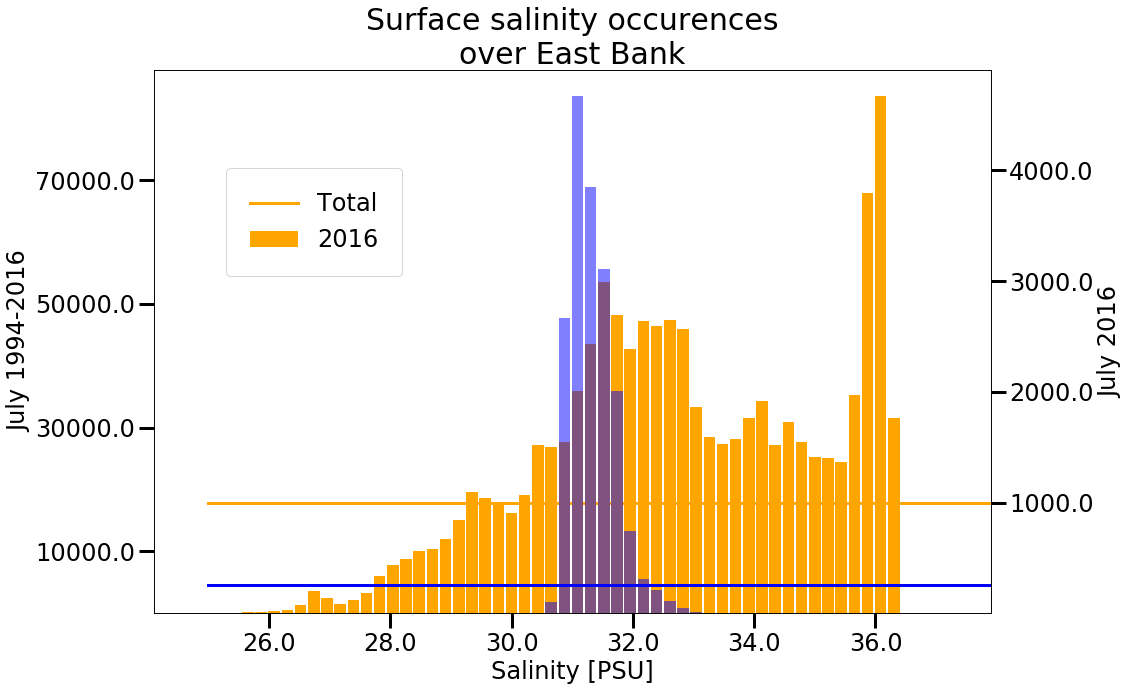

In [581]:
fig, ax1 = plt.subplots(figsize=(15,10))

salt = np.load("salinityhist.npz")

ax1.bar( salt["bins"][:-1], salt["hist"], color="orange", width=0.19)
popt, pcov = curve_fit(func, salt["bins"][:-1], salt["hist"])
xdata = np.linspace(salt["bins"][0], salt["bins"][-1], 1000 )
plotall = ax1.plot( xdata, func( xdata, *popt), color="orange", linewidth=3 )

ax1.set_xticks( np.linspace(24, 38, 8) )
ax1.set_xticklabels( np.linspace(24, 38, 8), fontsize=24 )
ax1.tick_params( length=15, width=3 )
ax1.set_yticks( np.linspace(10000, 70000, 4) )
ax1.set_yticklabels( np.linspace(10000, 70000, 4), fontsize=24 )
ax1.set_xlabel("Salinity [PSU]", fontsize=24)
ax1.set_ylabel("July 1994-2016", fontsize=24)


ax2 = ax1.twinx() 

salt = np.load("salinityhist2016.npz")



ax2.bar( bins16[:-1],  hist16, alpha=0.5, color="blue", width=0.19)
popt, pcov = curve_fit(func, bins16[:-1], hist16[:])
xdata = np.linspace(bins16[0], bins16[-1], 1000 )
plotall = ax2.plot( xdata, func( xdata, *popt), color="blue", linewidth=3 )
ax2.set_yticks( np.linspace(1000, 4000, 4) )
ax2.set_yticklabels( np.linspace(1000, 4000, 4), fontsize=24 )
ax2.tick_params( length=15, width=3 )
ax2.set_ylabel("July 2016", fontsize=24)

ax1.set_xlim( (24.1, 37.9) )
ax1.set_title( "Surface salinity occurences\nover East Bank", fontsize=30 )

fig.legend( (["Total", "2016"]), loc=(0.2,0.6), fontsize=24, borderpad=1 )